In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfm1 = pd.read_csv("../data/prices_round_4_day_1.csv", sep=';')
dfm2 = pd.read_csv("../data/prices_round_4_day_2.csv", sep=';')
dfm3 = pd.read_csv("../data/prices_round_4_day_3.csv", sep=';')
df1 = pd.read_csv("../data/observations_round_4_day_1.csv")
df2 = pd.read_csv("../data/observations_round_4_day_2.csv")
df3 = pd.read_csv("../data/observations_round_4_day_3.csv")
df2['timestamp'] += 1_000_000
df3['timestamp'] += 2_000_000
dfm2['timestamp'] += 1_000_000
dfm3['timestamp'] += 2_000_000
dfm_all = pd.concat([dfm1, dfm2, dfm3], ignore_index=True)
df_all = pd.concat([df1, df2, df3], ignore_index=True)







In [116]:
dfm_all = dfm_all[dfm_all['product'] == "MAGNIFICENT_MACARONS"]

dfm_all = dfm_all[['timestamp', 'mid_price']]

df_all = df_all[['timestamp', 'transportFees', 'exportTariff', 'sugarPrice' , 'sunlightIndex']]

dfm_all.rename(columns={'mid_price': 'macaron_mid_price'}, inplace=True)

print(dfm_all.head())
print(df_all.head())



    timestamp  macaron_mid_price
6           0              627.5
29        100              630.5
41        200              630.5
47        300              632.5
73        400              631.5
   timestamp  transportFees  exportTariff  sugarPrice  sunlightIndex
0          0            1.0           9.0  200.000000          60.00
1        100            1.0           9.0  200.098445          60.00
2        200            1.0           9.0  200.103915          60.00
3        300            1.0           9.0  200.352462          60.01
4        400            1.0           9.0  200.201545          60.01


In [117]:
merged_df = dfm_all.merge(df_all, on='timestamp', how='left')

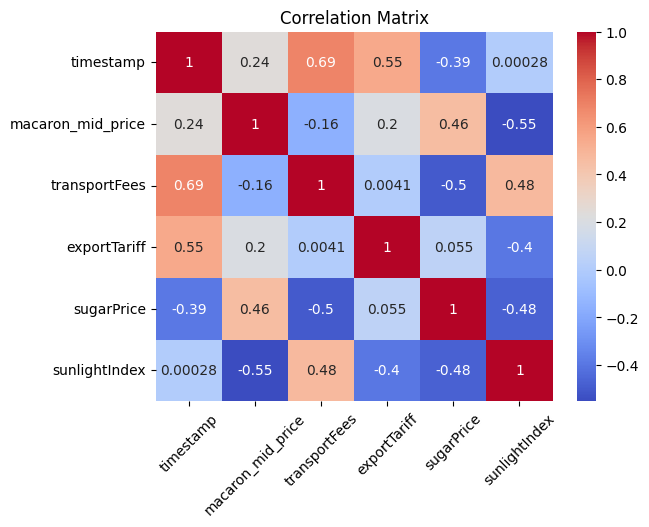

In [ ]:
corrMatrix = merged_df.corr()

sns.heatmap(corrMatrix,annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

#There is a clear negative correlation between sugarprice and sunlight index but didn't have time to investigate further. :/

#Hint from admins: it was well understood lore in Archipelago that low sunlight index can impact sugar and MACARON production negatively causing prices to rise due to panic among residents. However, ArchiResearchers have identified existence of a CriticalSunlightIndex (CSI).
#If sunlightIndex goes below this CSI with an anticipation to remain under this critical level for a long period of time, sugar and MACARON prices can increase by substantial amount with a strong correlation.
#When sunlightIndex is above this CSI, Sugar and MACARON prices tend to trade around their respective fair values and demonstrates market supply-demand dynamics.
#Can you find this CSI and use it to trade better than ever and make your island prosper? All the best!